In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import math
from google.colab import files
import glob
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


In [3]:
# Uploading database
uploaded = files.upload()

arq_csv = [i for i in glob.glob('*.{}'.format('csv'))]
df = pd.concat(pd.read_csv(f, sep=';') for f in arq_csv)

Saving Variaveis_Depressao+SC+CC.csv to Variaveis_Depressao+SC+CC.csv


# Removendo nulos (NaN)


In [4]:
df

,D0,D1,D1A,D1B,D2,D9,D9A1,D9A2,D10,D11,D12,D12A,D13,D14,D14A,D15,D16,D17,D18,D19,D20,D21,D22,D22A,D22B,D22B1,D22C,D22D,D22D1,D23,D23A01,D23A02,D23A03,D23A04,D23A05,D23A06,D23A07,D23A08,D23A09,D23A10,...,CC24F,CC24G,CC24H,CC25,CC26A,CC26B,CC26C,CC27,CC28A,CC28B,CC28C,CC28D,CC28E,CC28F,CC28G,CC29,CC30,CC31A,CC31B,CC32,CC33,CC34,CC35,CC48,CC48A,CC49A,CC49B,CC49C,CC49D,CC50A,CC50B,CC50C,CC50D,CC50E,CC50I,CC51,CC52,CC53,CC54,CC55
0,1.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1.0,0,0,4,2,5,1,5,5,5,5,1,2,4,100,30
1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5.0,3,0,0,0,5,5,5,5,5,5,1,1,1,70,80
2,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,1.0,3.0,2.0,1.0,1.0,54.0,6.0,3.0,NaN,NaN,NaN,1.0,3.0,6.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,10.0,30.0,1.0,8.0,2.0,5.0,5.0,5,1.0,4,0,2,2,5,5,5,5,5,5,1,2,1,50,1
3,1.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,1.0,5.0,5.0,5.0,1.0,1.0,30.0,24.0,2.0,10.0,4.0,7.0,2.0,1,NaN,0,0,12,7,5,5,1,5,5,5,1,1,4,100,2
4,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,4.0,4.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,3.0,20.0,1.0,5.0,5.0,5.0,10.0,1,NaN,2,0,2,4,5,5,5,5,5,5,1,3,3,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,4.0,4.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5.0,0,0,0,0,5,5,1,5,5,5,1,1,4,10,20
5033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,0,0,0,5,5,5,5,5,5,1,2,4,50,10
5034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,0,2,0,5,1,5,5,5,5,1,1,2,60,30
5035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1.0,4,0,0,0,5,5,5,5,5,5,2,2,4,80,40


In [5]:
stat_data = df.describe(include='all').T
stat_data['nulos'] = pd.DataFrame(df.isnull().sum())
stat_data['percent_nulos'] = pd.DataFrame(df.isna().mean().round(4) * 100)
stat_data["type"] = pd.Series(df.dtypes)
stat_data

,count,mean,std,min,25%,50%,75%,max,nulos,percent_nulos,type
D0,3390.0,1.152212,0.394510,1.0,1.0,1.0,1.0,3.0,1647,32.70,float64
D1,2919.0,1.609113,1.452350,1.0,1.0,1.0,1.0,8.0,2118,42.05,float64
D1A,2479.0,2.407019,1.919308,1.0,1.0,1.0,5.0,8.0,2558,50.78,float64
D1B,440.0,4.518182,1.303451,1.0,5.0,5.0,5.0,5.0,4597,91.26,float64
D2,426.0,3.936620,1.783116,1.0,1.0,5.0,5.0,8.0,4611,91.54,float64
...,...,...,...,...,...,...,...,...,...,...,...
CC51,5037.0,1.530673,1.044912,1.0,1.0,1.0,2.0,8.0,0,0.00,int64
CC52,5037.0,1.792535,1.207617,1.0,1.0,1.0,2.0,9.0,0,0.00,int64
CC53,5037.0,3.573556,0.977507,1.0,3.0,4.0,4.0,9.0,0,0.00,int64
CC54,5037.0,166.306730,304.472887,0.0,40.0,60.0,90.0,999.0,0,0.00,int64


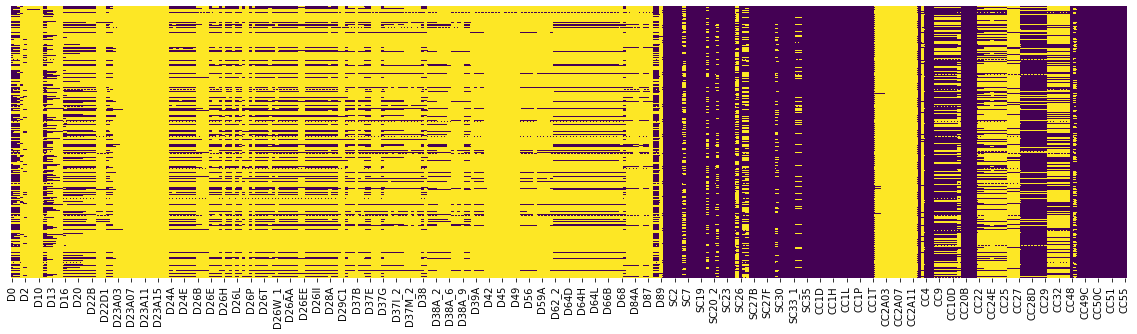

In [6]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax, )

In [7]:
df_wo_na = df.dropna(axis='columns', how='any') # drop columns filled by 1000 NaN or more
stat_data = df_wo_na.describe(include='all').T
stat_data['nulos'] = pd.DataFrame(df_wo_na.isnull().sum())
stat_data['percent_nulos'] = pd.DataFrame(df_wo_na.isna().mean().round(4) * 100)
stat_data["type"] = pd.Series(df_wo_na.dtypes)
stat_data

,count,mean,std,min,25%,50%,75%,max,nulos,percent_nulos,type
dsm_mddh,5037.0,4.297995,1.521732,1.0,5.0,5.0,5.0,5.0,0,0.0,int64
SC1,5037.0,41.517769,15.005041,18.0,29.0,40.0,52.0,93.0,0,0.0,int64
SC1_1,5037.0,1.565813,0.495699,1.0,1.0,2.0,2.0,2.0,0,0.0,int64
SC2,5037.0,16.527695,43.349269,1.0,5.0,11.0,22.0,999.0,0,0.0,int64
SC3,5037.0,2.619813,1.804864,1.0,1.0,2.0,5.0,9.0,0,0.0,int64
...,...,...,...,...,...,...,...,...,...,...,...
CC51,5037.0,1.530673,1.044912,1.0,1.0,1.0,2.0,8.0,0,0.0,int64
CC52,5037.0,1.792535,1.207617,1.0,1.0,1.0,2.0,9.0,0,0.0,int64
CC53,5037.0,3.573556,0.977507,1.0,3.0,4.0,4.0,9.0,0,0.0,int64
CC54,5037.0,166.306730,304.472887,0.0,40.0,60.0,90.0,999.0,0,0.0,int64


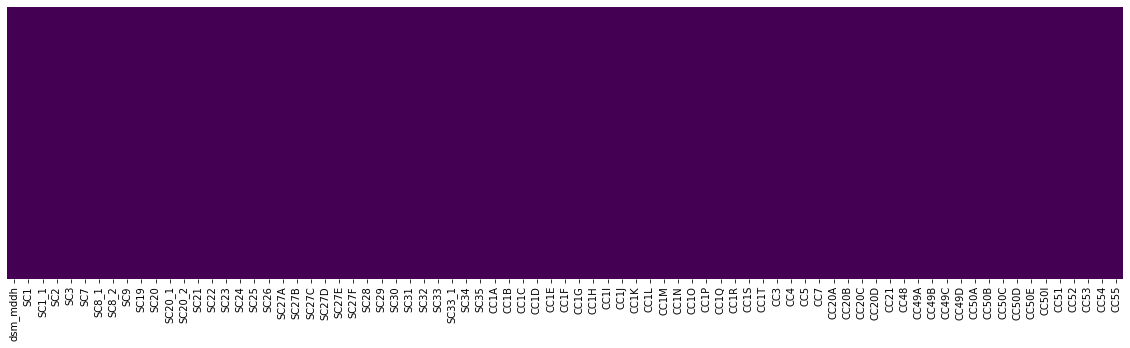

In [8]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(df_wo_na.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax, )

#### Reduzimos de 337 atributos para 79

In [9]:
df_wo_na

,dsm_mddh,SC1,SC1_1,SC2,SC3,SC7,SC8_1,SC8_2,SC9,SC19,SC20,SC20_1,SC20_2,SC21,SC22,SC23,SC24,SC25,SC26,SC27A,SC27B,SC27C,SC27D,SC27E,SC27F,SC28,SC29,SC30,SC31,SC32,SC33,SC33_1,SC34,SC35,CC1A,CC1B,CC1C,CC1D,CC1E,CC1F,CC1G,CC1H,CC1I,CC1J,CC1K,CC1L,CC1M,CC1N,CC1O,CC1P,CC1Q,CC1R,CC1S,CC1T,CC3,CC4,CC5,CC7,CC20A,CC20B,CC20C,CC20D,CC21,CC48,CC49A,CC49B,CC49C,CC49D,CC50A,CC50B,CC50C,CC50D,CC50E,CC50I,CC51,CC52,CC53,CC54,CC55
0,5,32,1,4,5,2,3,3,1,1,5,5,5,1,1,5,5,5,1,1,5,5,5,1,5,1,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,2,0,0,1,1,1,1,5,1,5,0,0,4,2,5,1,5,5,5,5,1,2,4,100,30
1,5,31,1,8,5,3,3,3,5,1,1,1,1,1,1,1,5,5,1,1,5,1,1,1,5,1,1,1,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,0,1,2,1,5,1,1,1,5,3,0,0,0,5,5,5,5,5,5,1,1,1,70,80
2,1,60,1,9,1,2,4,4,1,1,1,5,5,1,1,1,5,1,1,1,1,1,5,1,1,1,1,1,1,1,1,1,1,1,5,1,1,1,5,5,5,5,1,5,1,5,5,1,5,5,5,5,5,5,2,0,0,1,1,5,1,1,1,5,4,0,2,2,5,5,5,5,5,5,1,2,1,50,1
3,5,34,1,5,5,3,3,2,3,1,1,5,5,1,1,5,5,5,5,5,5,5,5,5,8,5,5,5,5,5,5,5,5,5,5,1,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,0,0,1,5,5,5,5,2,1,0,0,12,7,5,5,1,5,5,5,1,1,4,100,2
4,5,84,2,41,4,3,3,2,2,1,5,5,5,1,1,5,5,1,1,5,1,5,1,1,5,1,5,5,5,5,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,0,0,1,1,1,1,5,1,1,2,0,2,4,5,5,5,5,5,5,1,3,3,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,5,40,2,3,1,2,3,2,2,1,5,5,5,1,1,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,0,0,2,5,5,5,5,2,5,0,0,0,0,5,5,1,5,5,5,1,1,4,10,20
5033,5,24,1,16,5,1,1,1,2,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,0,0,2,5,5,5,5,2,1,2,0,0,0,5,5,5,5,5,5,1,2,4,50,10
5034,5,57,2,1,5,2,3,2,2,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,0,0,2,5,5,5,5,2,1,1,0,2,0,5,1,5,5,5,5,1,1,2,60,30
5035,5,19,1,30,5,2,3,3,1,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,0,0,2,5,5,5,5,2,5,4,0,0,0,5,5,5,5,5,5,2,2,4,80,40


# Removendo duplicatas (NÃO RODAR)



In [ ]:
df_deduped = df_wo_na.duplicated() # Checking
df_deduped

0       False
1       False
2       False
3       False
4       False
        ...  
5032     True
5033     True
5034     True
5035     True
5036     True
Length: 10074, dtype: bool

In [ ]:
df_deduped.drop_duplicates(keep=False, inplace=True)
df_deduped.duplicated()

0    False
0    False
dtype: bool

#### Acho que deu errado, vamos ignorar a remoção de duplicatas


# Seleção de características

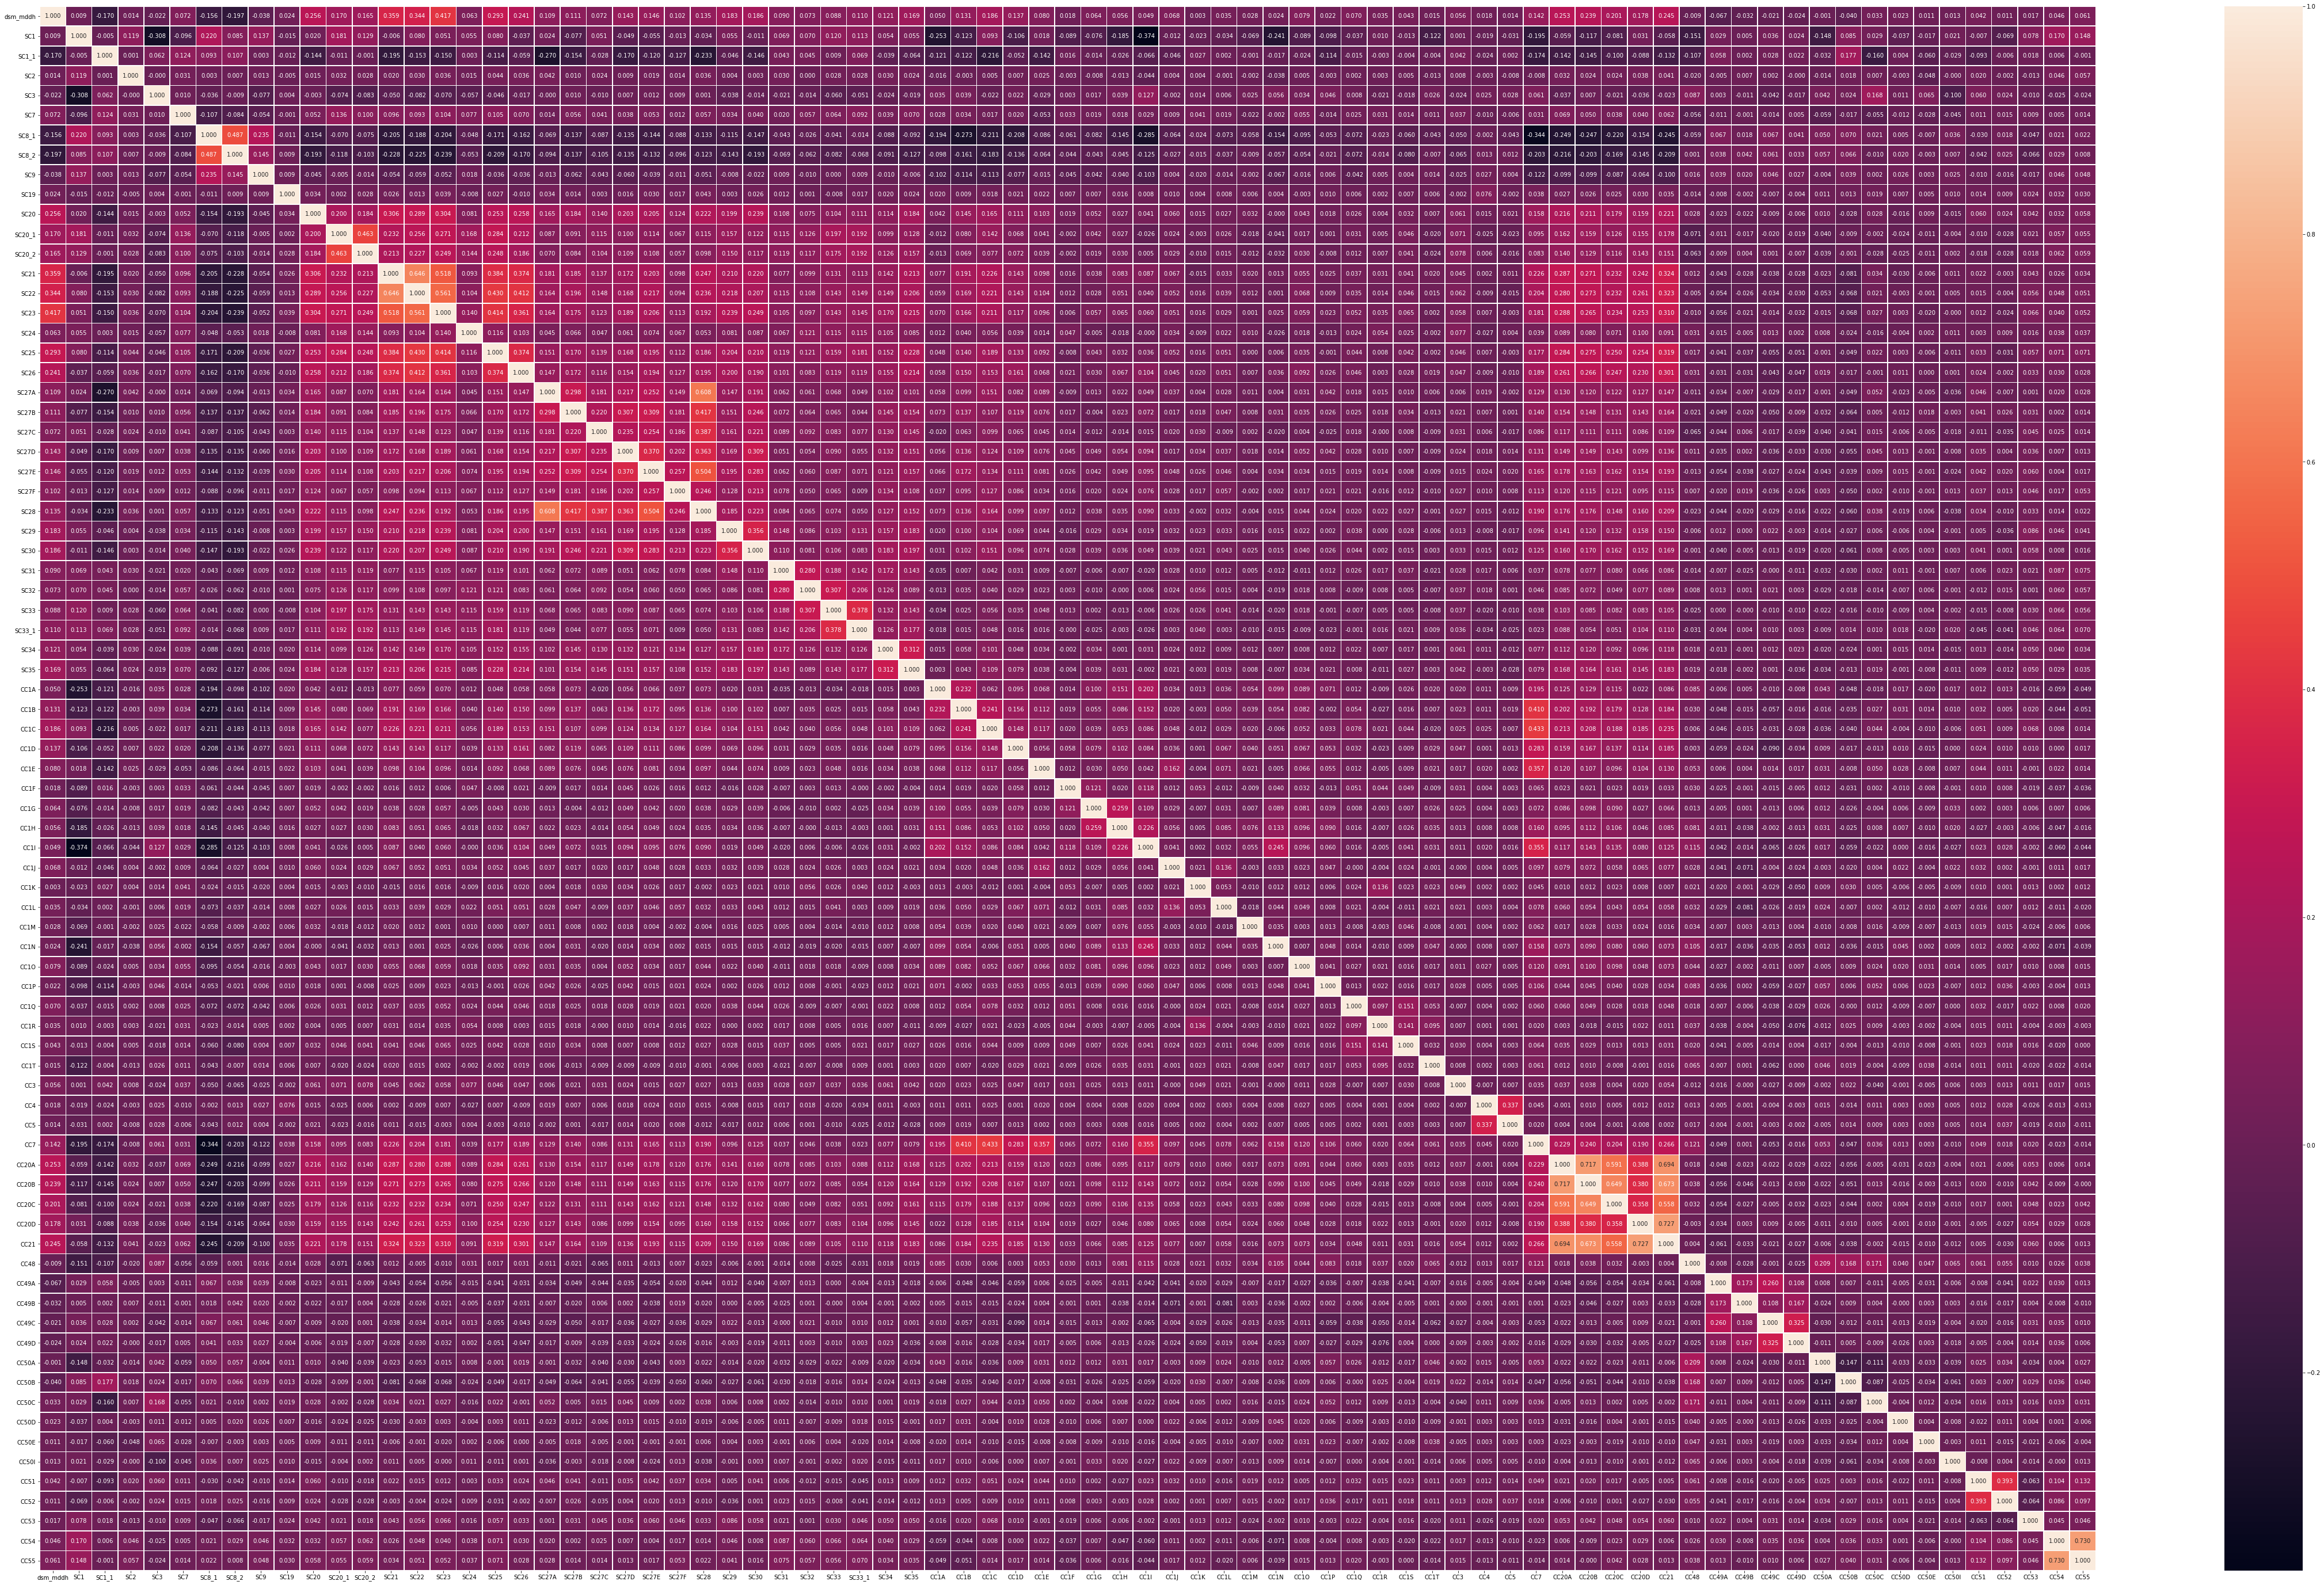

In [10]:
columns = list(df_wo_na.columns)
df_corr = df_wo_na[columns].corr()

f, ax = plt.subplots(figsize=(80, 50))
sns.heatmap(df_corr, annot=True, fmt=".3f", linewidths=.7, ax=ax);

In [11]:
x = df_wo_na.drop(columns='dsm_mddh')
y = df_wo_na['dsm_mddh']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42, shuffle=True)

In [21]:
# Selecting the best 10 characteristics
sel_ = SelectKBest(chi2, k=10).fit(x_train, y_train)
best_attributes = list(x_train.columns[sel_.get_support()])
best_df = df_wo_na[best_attributes]
print(best_attributes)

x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(best_df, df_wo_na['dsm_mddh'], test_size=0.30, random_state=42, shuffle=True)
print("Dados treino: {}".format(x_train_b.shape))
print("Dados teste: {}".format(x_test_b.shape))



['SC21', 'SC23', 'CC4', 'CC5', 'CC49A', 'CC49B', 'CC49C', 'CC49D', 'CC54', 'CC55']
Dados treino: (3525, 10)
Dados teste: (1512, 10)


In [14]:
x_train.head()

,SC1,SC1_1,SC2,SC3,SC7,SC8_1,SC8_2,SC9,SC19,SC20,SC20_1,SC20_2,SC21,SC22,SC23,SC24,SC25,SC26,SC27A,SC27B,SC27C,SC27D,SC27E,SC27F,SC28,SC29,SC30,SC31,SC32,SC33,SC33_1,SC34,SC35,CC1A,CC1B,CC1C,CC1D,CC1E,CC1F,CC1G,CC1H,CC1I,CC1J,CC1K,CC1L,CC1M,CC1N,CC1O,CC1P,CC1Q,CC1R,CC1S,CC1T,CC3,CC4,CC5,CC7,CC20A,CC20B,CC20C,CC20D,CC21,CC48,CC49A,CC49B,CC49C,CC49D,CC50A,CC50B,CC50C,CC50D,CC50E,CC50I,CC51,CC52,CC53,CC54,CC55
4833,33,2,16,1,3,3,1,3,1,5,1,5,5,5,5,5,5,5,1,5,5,5,5,5,1,5,5,8,5,5,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,0,0,1,5,5,5,5,2,5,0,0,2,0,5,5,5,5,5,5,1,2,4,100,0
2348,24,1,3,1,3,3,1,1,1,5,5,5,5,1,5,5,5,1,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,0,0,1,5,5,5,5,2,5,0,0,12,0,5,5,1,5,5,5,1,2,4,10,30
30,39,1,6,5,2,3,3,1,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,0,0,2,5,5,5,5,2,5,0,0,0,0,5,5,5,5,5,5,1,1,4,100,0
725,30,1,19,5,3,2,1,3,1,5,5,5,5,1,5,5,5,1,1,5,5,5,5,5,1,1,5,8,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,0,0,2,5,5,1,1,1,5,998,0,1,0,5,5,5,5,5,5,3,2,4,70,30
2974,26,2,15,5,3,3,3,4,1,1,1,1,1,1,1,5,1,1,1,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,1,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,0,0,1,5,5,5,5,2,1,3,0,2,0,5,1,5,5,5,5,3,4,1,998,998


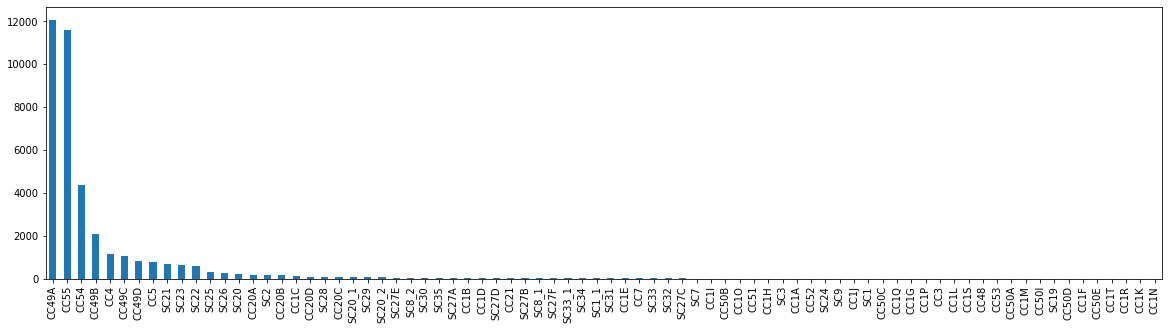

In [13]:
# Só um exemplo de outra forma de obter as melhores características, mas vamos usar o KBest msm
chi2_s = pd.Series(sel_.scores_)
chi2_s.index = x_train.columns
chi2_s = chi2_s.sort_values(ascending=False).plot.bar(figsize=(20,5))